## Codio Activity 2.1: Continuous Uniform Distributions

### This activity focuses on creating and visualizing continuous probability distributions using scipy.stats. You will get practice creating uniform distribution objects, examining their summary statistics (mean, variance, standard deviation), and visualizing the distribution using matplotlib.

In [24]:
from scipy.stats import uniform
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Problem 1: Creating a Distribution Object

#### To begin, use the above imported uniform function to create a uniform distribution object with loc = 10 and scale = 3. Assign your solution as a distribution object to dist1 below.

In [3]:
dist1 = uniform(loc = 10, scale = 3)

### Problem 2: Descriptive Statistics of Distribution

#### Using your distribution object from problem 1, determine the mean, variance, and standard deviation of the distribution using its own built in methods. Assign these as floats to the variables, dist1_mean, dist1_var, and dist1_std below.

In [4]:
dist1_mean = dist1.mean()
dist1_var = dist1.var()
dist1_std = dist1.std()

### Problem 3: Plotting the Distribution

#### Note that the distribution is bound by loc and loc + scale on the left and right sides respectively. To build a plot, we will give one unit extra on each so we see the entire distribution. To do so, define x using np.linspace and create an array of 100 evenly spaced values starting at 9 and ending at 14. Then, use these x values with dist1's .pdf method to produce a plot of the distribution using plt.plot. You should have a plot similar to that shown below.

In [5]:
x = np.linspace(9,14,100)
ppoints = dist1.pdf(x)

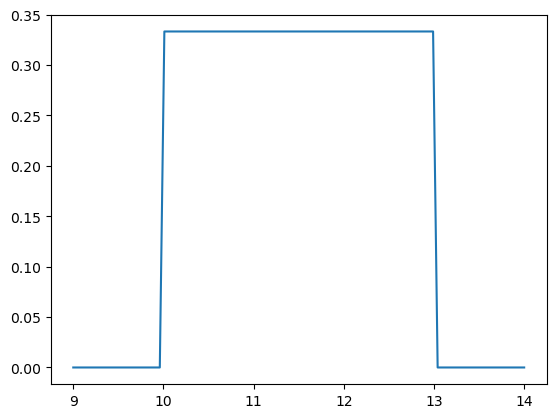

In [6]:
plt.plot(x,ppoints)

#### Sampling(rvs)

(array([1., 0., 1., 1., 0., 0., 1., 0., 0., 1.]),
 array([10.1701462 , 10.39169513, 10.61324406, 10.83479299, 11.05634193,
        11.27789086, 11.49943979, 11.72098872, 11.94253765, 12.16408658,
        12.38563552]),
 <BarContainer object of 10 artists>)

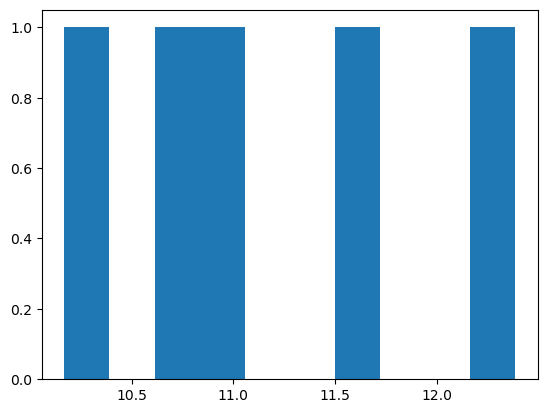

In [7]:
plt.hist(dist1.rvs(size=5))

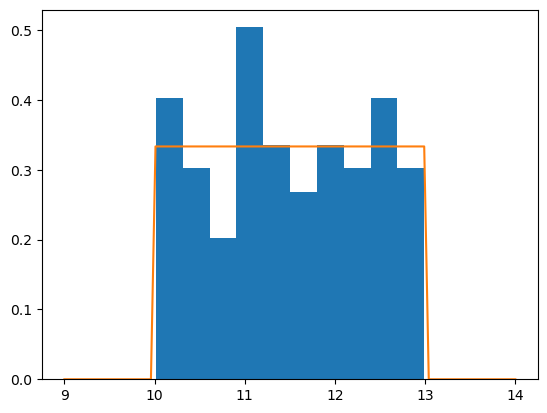

In [8]:
# rvs(size =100) get random 100 samples, density = True means they are at the right scale
plt.hist(dist1.rvs(size = 100), density = True)
plt.plot(x, ppoints)

### Problem 4: Evaluating Probabilities 

Finally, you want to use the `.pdf` method to evaluate the probability of a specific outcome.  Determine the following probabilities using `dist1` and assign to the respective variables as floats below. Consider the events P(11) and P(12) mutually exclusive events.

- $P(9)$
- $P(11)$
- $P(11~ \text{or} ~12)$
  

In [9]:
p_9 = dist1.pdf(9)
p_9

np.float64(0.0)

In [10]:
p_11 = dist1.pdf(11)
p_11

np.float64(0.3333333333333333)

In [11]:
# important: 2 points pdf is the addition of the two pdf
p_11_or_12 = dist1.pdf(11)+dist1.pdf(12)
p_11_or_12

np.float64(0.6666666666666666)

### Problem 5: Cumulative Probabilities

The `.cdf` method can be used to determine cumulative probabilities.  Use the `.cdf` method of `dist1` to determine the following probabilities and assign them as a float to the relevant variable below. 

- $P(x < 12)$
- $P(11 < x < 13)$
- $P(x > 12)$

In [12]:
p_less_12 = dist1.cdf(12)
p_less_12

np.float64(0.6666666666666666)

In [13]:
p_11_and_13 = dist1.cdf(13) - dist1.cdf(11)
p_11_and_13

np.float64(0.6666666666666667)

In [14]:
p_greater_12 = 1- dist1.cdf(12)
p_greater_12

np.float64(0.33333333333333337)

### Codio Activity 2.2: Gaussian Distributions

This activity focuses on generating and examining Gaussian distributions using `scipy.stats`.  The main idea is to use the distribution to generate a sample and compare the sample statistics to those known in your distribution.   Note that you are to use the `.rvs` method of the distribution object rather than any NumPy methods directly for generating samples.  


### Problem 1: Creating a Gaussian Distribution Object

Above, the Gaussian distribution function has been imported using the `norm` function from the `scipy.stats` library.

Use this function to create a Guassian distribution centered at 5 with standard deviation equal to 2.  Assign your solution as a distribution object to `gauss1` below.

In [15]:
gauss1 = norm(loc = 5, scale = 2)
gauss1

### Problem 2: Random Samples from Distribution

Use the `.rvs` method on `gauss1` to generate 100 random samples from the distribution.  Inside the `.rvs` method, set`random_state` equal to 12. Assign your response as an array to the variable `samples` below.

In [16]:
samples = gauss1.rvs(100, random_state = 12)

### Problem 3: Statistics of Sample

Use `np.mean` and `np.std` on the variable `samples` you defined in Problem 2 to determine the mean and standard deviation of the sample values.

Assign the result to the variables `sample_mean` and `sample_std`, respectively. 

In [17]:
sample_mean = np.mean(samples)
sample_std = np.std(samples)

### Plotting the Distribution and Sample

The plot below shows the distribution of the data used in this activity.

![](images/distandsamples.png)

The distribution created is centered at 5 with a standard deviation of 2.  By properties of the normal distribution, 99% of the data will be with $\pm ~ 3\sigma$.  Accordingly, an array `x` is created using `np.linspace` with 1000 evenly spaced values $\mu \pm 3\sigma$ (plus and minus three standard deviations from the mean).  

The code to create the plot above is given below:

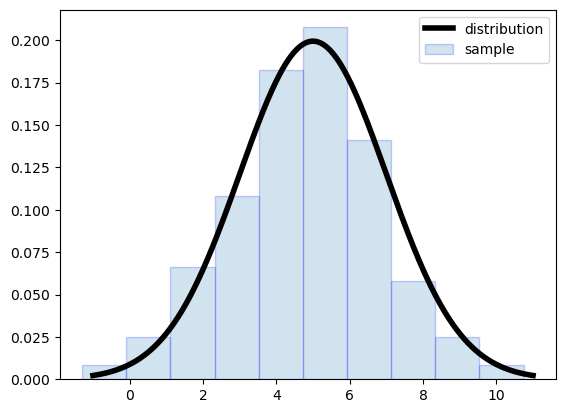

In [23]:
x = np.linspace(-1,11,1000)
plt.plot(x, gauss1.pdf(x), color = 'black', linewidth = 4, label = 'distribution')
plt.hist(samples,density = True, alpha = 0.2, bins = 10, edgecolor = 'blue', label = 'sample')
plt.legend();

## Codio Activity 2.3: The Law of Large Numbers

In this activity, you will draw increasingly sized samples from a given distribution.  These samples means will be tracked, and compared to that which is known from the larger distribution.  You are to use the `scipy.stats` module and its distribution objects to produce these distributions and their samples.


### Problem 1: A Uniform Distribution

Use the `uniform` function to create a uniform distribution with `loc = 5` and `scale = 10`.  Assign your results as a distribution object to the variale `dist1` below. 

Done correctly, this code will produce uniformly distributed points between 5 and 15 with mean at 10.

In [25]:
dist2 = uniform(loc = 5, scale = 10)

###  Problem 2: Loop of Samples

Use a `for` loop to generate samples of sizes from 1 to 500. Inside the `for` loop, use the `.rvs` method on `dist1` to return a random sample. Inside the `.rvs` method set `random_state` equal to 22.  Use `np.mean` to compute the sample mean of each sample size. Append each sample mean to the list `sample_means`.  

In [39]:
sample_means = []
for i in range(1,501):
    sample_means.append(np.mean(dist2.rvs(i,random_state=22)))
sample_means[:5]

[np.float64(7.084605373588426),
 np.float64(8.450707995611044),
 np.float64(8.702265448121944),
 np.float64(9.924654082394818),
 np.float64(9.2820463731392)]

### Problem 3: Comparing the sample means to the actual mean

Note that the actual mean of our data is 10.  

Does the sample mean approximate to the true mean with an error of less than .1 when the sample size is equal to 400?  Assign your answer as a boolean value to `ans3` below -- True for yes, False for no.  

To help you with this exercise, the results of the sample mean are plot below:

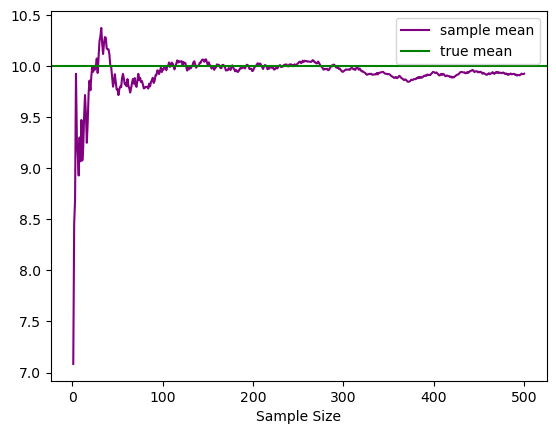

In [33]:
plt.plot(range(1,501), sample_means, color = 'purple', label = 'sample mean')
plt.axhline(10, color = 'green', label = 'true mean')
plt.xlabel('Sample Size')
plt.legend();

In [34]:
ans3 = abs(sample_means[399]-10) < 0.1
ans3

np.True_

### Problem 4: Distribution of Sample Means

As you notice in the plot above, there is larger variation in the small sample sizes.  As the lectures suggest, consider only those samples of size 30 or more and compute their mean and standard deviation.  

Assign the samples of size 30 or more as a list to the variable `samples_30_or_more` below.

Use `np.mean()` to compute the mean and assign the result to the variable `samples_mean`.

Use `np.std()` to compute the standard deviation and assign the result to the variable `samples_std`.

Uncomment the code to see a histogram of these sample means.  

HINT: remember that Python starts counting at 0, so using `sample_means[30:]` is actually incorrect.

In [35]:
samples_30_or_more = sample_means[29:]

In [36]:
samples_mean = np.mean(samples_30_or_more)
samples_std = np.std(samples_30_or_more)

### Problem 5: Repeat with Gaussian Distribution

Now, you are to repeat the above exercise using samples from a Guassian distribution


Use the fucntion `norm` with argument `loc` equal to five and `scale` equal to ten to define a Gaussian distribution and assign the result to `gauss_dist`.

Use a `for` loop to generate samples of sizes from 30 to 500. Inside the `for` loop, use the `.rvs` method on `gauss_dist` to return a random sample. Inside the `.rvs` method set `random_state` equal to 22.  Use `np.mean` to compute the sample mean of each sample size. Append each sample mean to the list `sample_means_gauss`.  

Outside the `for` loop, use `np.mean()` to compute the mean and assign the result to the variable `gauss_mean`.

Outside the `for` loop, use `np.std()` to compute the standard deviation and assign the result to the variable `gauss_standard_deviation`.

In [38]:
gauss_dist = norm(loc = 5, scale = 10)
sample_means_gauss = []
for i in range(30,501):
    sampleg = gauss_dist.rvs(i, random_state = 22)
    s_mean = np.mean(sampleg)
    sample_means_gauss.append(s_mean)
gauss_mean = np.mean(sample_means_gauss)
gauss_standard_deviation = np.std(sample_means_gauss)
print(gauss_mean,gauss_standard_deviation)

5.56850847319431 0.5371819419572756
